##**CASE STUDY: Query in a distributed environment of a FHIR dataset resulting from a process of Extract-Transform-Load**
The aim of this example is to present how the [Common Provenance Model (CPM)](https://zenodo.org/records/8279525) can be applied in a simple research use case in the biomedical domain in combination with domain-specific provenance tracking methods, like the HL7 FHIR Provenance resources. Here we show how to express the provenance of a distributed process in which a large dataset related to colorectal cancer cohort cases (CRC-Cohort) gathered across several European biobanks is converted to [HL7 FHIR resources](https://hl7.org/FHIR/provenance.html) and queried.

In particular, the [CRC-Cohort](https://www.bbmri-eric.eu/scientific-collaboration/colorectal-cancer-cohort/) dataset is a collection of harmonised data related to over 10,000 cases of colorectal cancer samples collected by several European biobanks under the coordination of the national nodes of the [Biobanking and Biomolecular Resources Research Infrastructure – European Research Infrastructure Consortium (BBMRI-ERIC)](https://www.bbmri-eric.eu/) within the [European Project ADOPT](https://www.bbmri-eric.eu/scientific-collaboration/adopt-bbmri-eric/).

The process includes two main sub-processes:

A) *Extract-Transform-Load of the CRC-Cohort clinical data (CRC-Cohort FHIR Export)*. To be searchable in  [BBMRI-ERIC Sample and Data Portal](https://www.bbmri-eric.eu/bbmri-sample-and-data-portal/), through the [BBMRI-ERIC Sample Locator](https://samplelocator.bbmri.de/), the cohort dataset, persisted in an [openEHR-based repository](https://github.com/crs4/crc_cohort_modelling), is converted to a set of HL7 FHIR resources, according to [predefined profiles](https://samply.github.io/bbmri-fhir-ig/howtoJoin.html). In this example, we assume that the software performing this activity also generates the FHIR provenance resources documenting the operation.

B) *Federated query by researchers in external institutions (Federated Query)*. A researcher from any institution, after logging in with recognised credentials (Life Sciences Research Infrastructure, ORCID, etc.), can perform a search by means of the Sample Locator and obtain aggregated results about samples and associated data, further requiring access under specific [access policies](https://www.bbmri-eric.eu/services/access-policies/).


In this case study, we assume that the software performing the ETL also generates the FHIR Provenance Resources documenting the operation, and we present an example of how this domain-specific provenance information could be integrated in the provenance description according to the CPM. At present, the approach shown in the case study is not implemented in the actual environment, it has been generated as a practical guide in similar use cases, being a realistic example based on sinthetic data and steps, simulating those included in the real-world process.

This notebook contains the code to generate the finalised provenance for this case study. It includes the generation of two bundles corresponding to the finalised provenance of the two sub-processes, each consisting of transversal information (*backbone*) and domain-specific provenance, including the HL7 FHIR Provenance resources generated to document the conversion. Please note that the namespace URLs, except for those of existing ontologies, and the entity IDs used in this notebook are only illustrative and not real. Examples of the synthetic data generated are availabe at [LINK TO ZENODO].

##**Set up**

In [1]:
!pip install prov[dot]
from prov.model import ProvDocument
from prov.serializers import Serializer
from prov.model import ProvDocument
from IPython.display import Image
from prov.dot import prov_to_dot
from prov.dot import PROV_DERIVATION
from prov.dot import DOT_PROV_STYLE

#from google.colab import drive

#import pathlib
#import hashlib
#from hashlib import sha256

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.7 MB/s eta 0:00:00


In [2]:
#personalised color for the derivation arrows
DOT_PROV_STYLE[PROV_DERIVATION]['color']='#817ffe'
DOT_PROV_STYLE[PROV_DERIVATION]['fontcolor']='#817ffe'

##**CRC-Cohort ETL**

In [3]:
d1 = ProvDocument()

In [4]:
d1.add_namespace('bbmri', 'https://bbmri-eric.eu/')


<Namespace: bbmri {https://bbmri-eric.eu/}>

In [5]:
bundle1 = d1.bundle('bbmri:etl.provn')

bundle1.add_namespace('bbmri', 'https://bbmri-eric.eu/')
bundle1.add_namespace('cpm','https://www.commonprovenancemodel.org/cpm-namespace-v1-0/')
bundle1.add_namespace('dct', 'http://purl.org/dc/terms/')


<Namespace: dct {http://purl.org/dc/terms/}>

In [6]:
#Provenance backbone

#current connector
bundle1.entity('bbmri:CRCC_dataset_connector',{'prov:type':bundle1.valid_qualified_name('cpm:currentConnector')})

#main activity
mainActivity = bundle1.activity('bbmri:CRCC_ETL', other_attributes={'prov:type':bundle1.valid_qualified_name('cpm:mainActivity')})
mainActivity.add_attributes({'dct:hasPart': 'bbmri:fhir_conversion'})
mainActivity.add_attributes({'dct:hasPart': 'bbmri:storage'})
bundle1.used('bbmri:CRCC_ETL','bbmri:CRCC_dataset_connector')

#receiver agent
bundle1.agent('bbmri:research_group',{'prov:type':bundle1.valid_qualified_name('cpm:receiverAgent')})

#forward connector
bundle1.entity('bbmri:fhir_resources_connector',{'prov:type':bundle1.valid_qualified_name('cpm:forwardConnector')})
bundle1.wasGeneratedBy('bbmri:fhir_resources_connector','bbmri:CRCC_ETL')
bundle1.wasAttributedTo('bbmri:fhir_resources_connector','bbmri:research_group')
bundle1.wasDerivedFrom('bbmri:fhir_resources_connector','bbmri:CRCC_dataset_connector')



<ProvDerivation: (bbmri:fhir_resources_connector, bbmri:CRCC_dataset_connector)>

In [7]:
# Domain-specific provenance

bundle1.agent('bbmri:csit')
bundle1.agent('bbmri:converter')

# FHIR conversion
bundle1.entity('bbmri:openehr_CRCC_repository', other_attributes={'cpm:externalId':'oehr_repo-id-0'})
bundle1.entity('bbmri:fhir_clinical_resources', other_attributes={'cpm:externalId':'fhir_clin_set-id-0'})
bundle1.entity('bbmri:fhir_provenance_resources', other_attributes={'cpm:externalId':'fhir_prov_set-id-0'})

bundle1.activity('bbmri:fhir_conversion', other_attributes={'bbmri:conversion_timestamp':'2024-05-03T11:08:00'})
bundle1.wasAssociatedWith('bbmri:fhir_conversion','bbmri:csit')
bundle1.wasAssociatedWith('bbmri:fhir_conversion','bbmri:converter')
bundle1.used('bbmri:fhir_conversion','bbmri:openehr_CRCC_repository')

bundle1.wasGeneratedBy('bbmri:fhir_clinical_resources','bbmri:fhir_conversion')
bundle1.wasGeneratedBy('bbmri:fhir_provenance_resources','bbmri:fhir_conversion')

bundle1.wasDerivedFrom('bbmri:fhir_clinical_resources','bbmri:openehr_CRCC_repository')
bundle1.wasDerivedFrom('bbmri:fhir_provenance_resources','bbmri:openehr_CRCC_repository')

bundle1.specializationOf('bbmri:openehr_CRCC_repository','bbmri:CRCC_dataset_connector')


#Storage
bundle1.entity('bbmri:fhir_CRCC_repository', other_attributes={'cpm:externalId':'fhir_repo-id-0'})

bundle1.activity('bbmri:storage', other_attributes={'bbmri:storage_timestamp':'2024-05-03T11:08:00'})
bundle1.wasAssociatedWith('bbmri:storage','bbmri:csit')
bundle1.used('bbmri:storage','bbmri:fhir_clinical_resources')
bundle1.used('bbmri:storage','bbmri:fhir_provenance_resources')

bundle1.wasGeneratedBy('bbmri:fhir_CRCC_repository','bbmri:storage')
bundle1.wasDerivedFrom('bbmri:fhir_CRCC_repository','bbmri:fhir_clinical_resources')
bundle1.wasDerivedFrom('bbmri:fhir_CRCC_repository','bbmri:fhir_provenance_resources')
bundle1.specializationOf('bbmri:fhir_CRCC_repository','bbmri:fhir_resources_connector')




<ProvSpecialization: (bbmri:fhir_CRCC_repository, bbmri:fhir_resources_connector)>

In [8]:
#provn serialization
print(d1.get_provn())
d1.serialize('/content/1_ETL_bundle.provn',format='provn')

document
  prefix bbmri <https://bbmri-eric.eu/>
  
  bundle bbmri:etl.provn
    prefix bbmri <https://bbmri-eric.eu/>
    prefix cpm <https://www.commonprovenancemodel.org/cpm-namespace-v1-0/>
    prefix dct <http://purl.org/dc/terms/>
    
    entity(bbmri:CRCC_dataset_connector, [prov:type='cpm:currentConnector'])
    activity(bbmri:CRCC_ETL, -, -, [prov:type='cpm:mainActivity', dct:hasPart="bbmri:fhir_conversion", dct:hasPart="bbmri:storage"])
    used(bbmri:CRCC_ETL, bbmri:CRCC_dataset_connector, -)
    agent(bbmri:research_group, [prov:type='cpm:receiverAgent'])
    entity(bbmri:fhir_resources_connector, [prov:type='cpm:forwardConnector'])
    wasGeneratedBy(bbmri:fhir_resources_connector, bbmri:CRCC_ETL, -)
    wasAttributedTo(bbmri:fhir_resources_connector, bbmri:research_group)
    wasDerivedFrom(bbmri:fhir_resources_connector, bbmri:CRCC_dataset_connector, -, -, -)
    agent(bbmri:csit)
    agent(bbmri:converter)
    entity(bbmri:openehr_CRCC_repository, [cpm:externalId="oehr

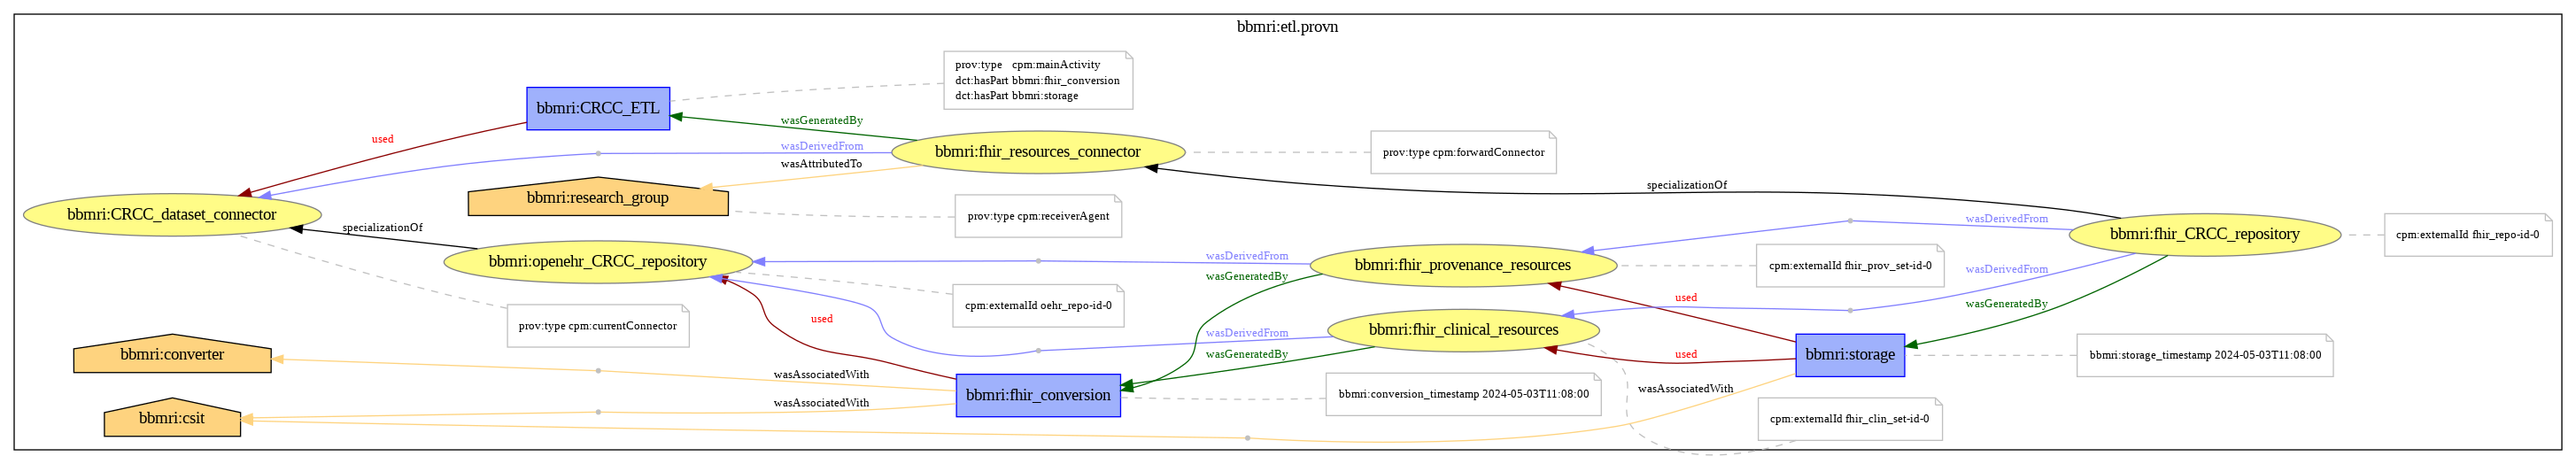

In [9]:
# export and visualization of the graph
dot = prov_to_dot(d1,direction='RL')
dot.write_svg('1_ETL.svg')
dot.write_png('1_ETL.png')

Image('1_ETL.png')

##**Federated data query**

In [10]:
d2 = ProvDocument()

In [11]:
d2.add_namespace('ri', 'https://researchcentre.org')


<Namespace: ri {https://researchcentre.org}>

In [12]:
# @title
bundle2 = d2.bundle('ri:query.provn')

bundle2.add_namespace('bbmri', 'https://bbmri-eric.eu/')
bundle2.add_namespace('ri', 'https://researchcentre.org')
bundle2.add_namespace('cpm','https://www.commonprovenancemodel.org/cpm-namespace-v1-0/')
bundle2.add_namespace('dct', 'http://purl.org/dc/terms/')


<Namespace: dct {http://purl.org/dc/terms/}>

In [13]:
#Provenance backbone

# backward connector
bundle2.agent('ri:bbmri_csit',{'prov:type' : bundle2.valid_qualified_name('cpm:senderAgent')}) #sender agent
bundle2.entity('bbmri:fhir_resources_connector',{'prov:type':bundle2.valid_qualified_name('cpm:backwardConnector')}) #backward connector
bundle2.wasAttributedTo('bbmri:fhir_resources_connector','ri:bbmri_csit')

# receipt
bundle2.activity('ri:receipt',other_attributes={'prov:type':bundle2.valid_qualified_name('cpm:receiptActivity')}) #receipt activity
bundle2.used('ri:receipt','bbmri:fhir_resources_connector')
bundle2.wasInvalidatedBy('bbmri:fhir_resources_connector', 'ri:receipt')

#current connector
bundle2.entity('ri:fhir_dataset_connector',{'prov:type':bundle2.valid_qualified_name('cpm:currentConnector')}) #current connector
bundle2.wasGeneratedBy('ri:fhir_dataset_connector','ri:receipt')
bundle2.wasDerivedFrom('ri:fhir_dataset_connector', 'bbmri:fhir_resources_connector')

#main activity
mainActivity = bundle2.activity('ri:federated_query', other_attributes={'prov:type':bundle2.valid_qualified_name('cpm:mainActivity')})
mainActivity.add_attributes({'dct:hasPart': 'ri:query'})
mainActivity.add_attributes({'dct:hasPart': 'ri:results_aggregation'})
bundle2.used('ri:federated_query','ri:fhir_dataset_connector')

#forward connector
bundle2.agent('ri:research_group',{'prov:type':bundle2.valid_qualified_name('cpm:receiverAgent')}) #receiver agent
bundle2.entity('ri:aggregated_results_connector',{'prov:type':bundle2.valid_qualified_name('cpm:forwardConnector')}) #forward connector
bundle2.wasGeneratedBy('ri:aggregated_results_connector','ri:federated_query')
bundle2.wasAttributedTo('ri:aggregated_results_connector','ri:research_group')
bundle2.wasDerivedFrom('ri:aggregated_results_connector','ri:fhir_dataset_connector')



<ProvDerivation: (ri:aggregated_results_connector, ri:fhir_dataset_connector)>

In [14]:
# Domain-specific provenance

# Query
bundle2.entity('ri:fhir_clinical_resources', other_attributes={'cpm:externalId':'fhir_clin_set-id-0'})
bundle2.entity('ri:query_results')

bundle2.activity('ri:query', other_attributes={'ri:query_timestamp':'2024-05-03T11:08:00'})
bundle2.wasAssociatedWith('ri:query','ri:research_group')
bundle2.used('ri:query','ri:fhir_clinical_resources')
bundle2.wasGeneratedBy('ri:query_results','ri:query')
bundle2.wasDerivedFrom('ri:query_results','ri:fhir_clinical_resources')

bundle2.specializationOf('ri:fhir_clinical_resources','ri:fhir_dataset_connector')


#Results aggregation
bundle2.entity('ri:exposed_results')
bundle2.activity('ri:results_aggregation', other_attributes={'ri:aggregation_timestamp':'2024-05-03T11:08:00'})
bundle2.used('ri:results_aggregation','ri:query_results')
bundle2.wasGeneratedBy('ri:exposed_results','ri:results_aggregation')
bundle2.wasDerivedFrom('ri:exposed_results','ri:query_results')
bundle2.specializationOf('ri:exposed_results','ri:aggregated_results_connector')




<ProvSpecialization: (ri:exposed_results, ri:aggregated_results_connector)>

In [15]:
#provn serialization
print(d2.get_provn())
d2.serialize('/content/2_federated_query_bundle.provn',format='provn')

document
  prefix ri <https://researchcentre.org>
  
  bundle ri:query.provn
    prefix bbmri <https://bbmri-eric.eu/>
    prefix ri <https://researchcentre.org>
    prefix cpm <https://www.commonprovenancemodel.org/cpm-namespace-v1-0/>
    prefix dct <http://purl.org/dc/terms/>
    
    agent(ri:bbmri_csit, [prov:type='cpm:senderAgent'])
    entity(bbmri:fhir_resources_connector, [prov:type='cpm:backwardConnector'])
    wasAttributedTo(bbmri:fhir_resources_connector, ri:bbmri_csit)
    activity(ri:receipt, -, -, [prov:type='cpm:receiptActivity'])
    used(ri:receipt, bbmri:fhir_resources_connector, -)
    wasInvalidatedBy(bbmri:fhir_resources_connector, ri:receipt, -)
    entity(ri:fhir_dataset_connector, [prov:type='cpm:currentConnector'])
    wasGeneratedBy(ri:fhir_dataset_connector, ri:receipt, -)
    wasDerivedFrom(ri:fhir_dataset_connector, bbmri:fhir_resources_connector, -, -, -)
    activity(ri:federated_query, -, -, [prov:type='cpm:mainActivity', dct:hasPart="ri:results_aggreg

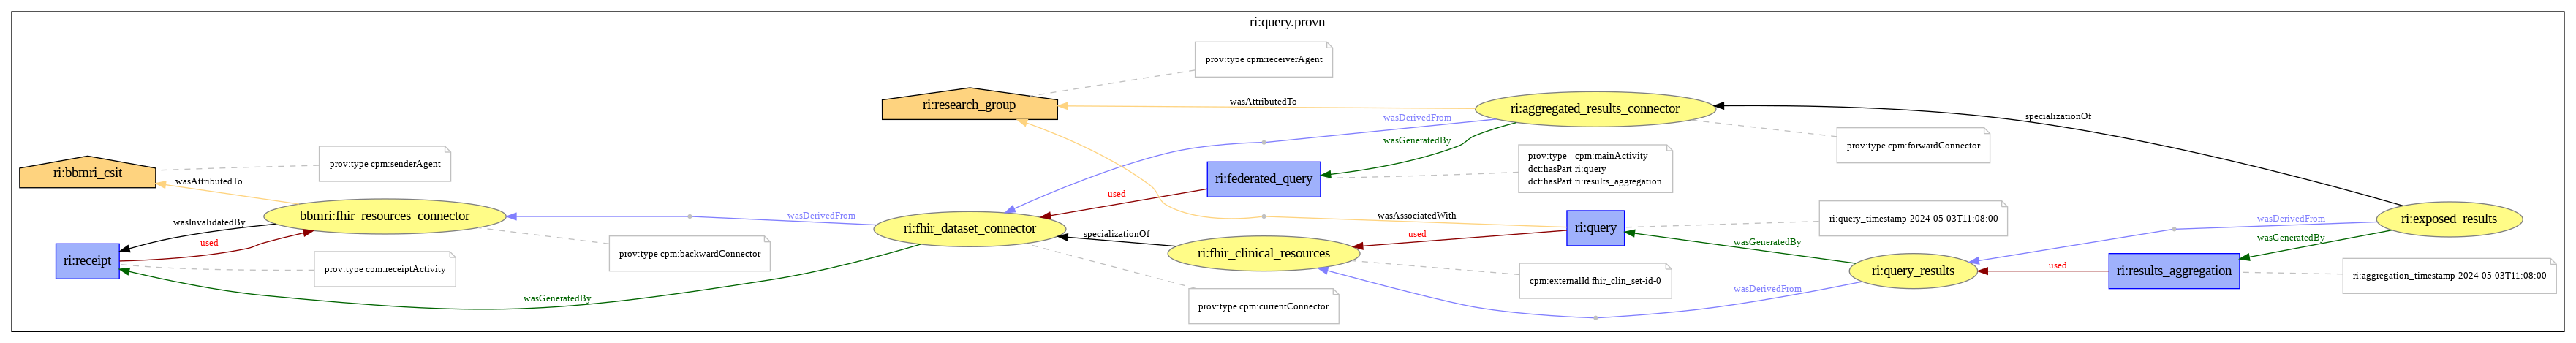

In [16]:
# export and visualization of the graph
dot = prov_to_dot(d2,direction='RL')
dot.write_svg('2_federated_query.svg')
dot.write_png('2_federated_query.png')

Image('2_federated_query.png')